# Problem 4
## Problem 4.1

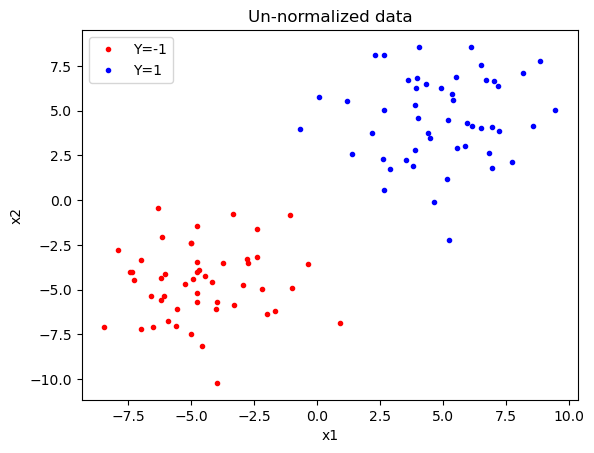

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#initialize an array of zeros to store the samples

X = np.zeros((100,2))
Y = np.zeros((100,1),dtype= int)

#configure the negative values
Y[0:50] = -1
mean = [-5,-5]
cov = [[5,0],[0,5]]
X[0:50] = np.random.multivariate_normal(mean,cov,50)

#configure the positive values
Y[50:] = 1
mean = [5,5]
cov = [[5,0],[0,5]]
X[50:] = np.random.multivariate_normal(mean,cov,50)

plt.plot(X[0:50,0],X[0:50,1],'r.',label="Y=-1")
plt.plot(X[50:,0],X[50:,1],'b.',label="Y=1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Un-normalized data")
plt.legend()
plt.show()

## Problem 4.2


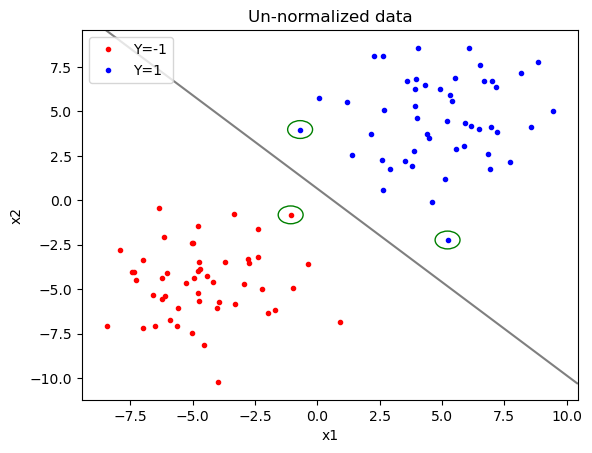

In [2]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

clf = svm.SVC(kernel="linear", C=1)
clf.fit(X,Y.transpose()[0])
support_vectors = clf.support_vectors_

ax = plt.gca()

#plot the points
plt.plot(X[0:50,0],X[0:50,1],'r.',label="Y=-1")
plt.plot(X[50:,0],X[50:,1],'b.',label="Y=1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Un-normalized data")
plt.legend()


#put a circle around the support vectors
for point in support_vectors:
    cir = plt.Circle(point,0.5,color='g',fill = False)
    ax.add_patch(cir)

#can clf.coef_
clf.intercept_

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

# Problem 4.3


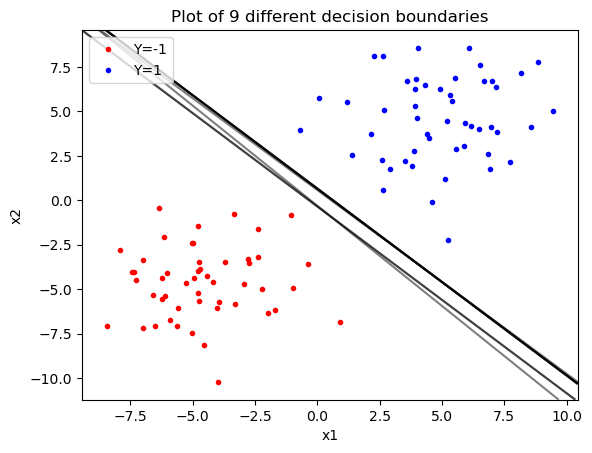

In [3]:
#plot the points
ax = plt.gca()
plt.plot(X[0:50,0],X[0:50,1],'r.',label="Y=-1")
plt.plot(X[50:,0],X[50:,1],'b.',label="Y=1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Plot of 9 different decision boundaries")
plt.legend()

C_vals_to_test = np.array([1e-4,3e-2,5e-2,1e-1,1,3,7,20,1e8])
num_sv = np.zeros(C_vals_to_test.size)


for i in range(0,C_vals_to_test.size):

    clf = svm.SVC(kernel="linear",C=C_vals_to_test[i])
    clf.fit(X,Y.transpose()[0])
    num_sv[i] = clf.n_support_.sum()

    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        plot_method="contour",
        colors="k",
        levels=[0],
        alpha=0.5,
        linestyles=["-"],
        ax=ax,
    )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


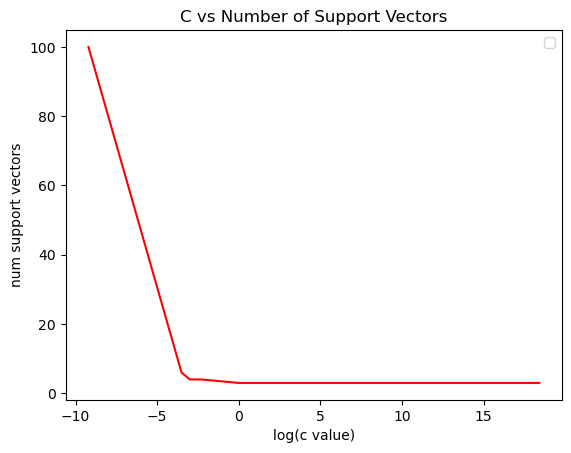

In [4]:
ax = plt.gca()
plt.plot(np.log(C_vals_to_test),num_sv,'r-')
plt.xlabel("log(c value)")
plt.ylabel("num support vectors")
plt.title("C vs Number of Support Vectors")
plt.legend()

As the value of C increases, the number of support vectors decreases exponentially. 

# Problem 5
## Problem 5.1

See Overleaf writeup


## Problem 5.2

In [27]:
import csv
# define several support funcitons


def load_dict(file_name):
    """read the dictionary file and save it into a dictionary

    Args:
        file_name (string): the path to the dictionary file

    Returns:
        dict: the parsed dictionary
    """

    #open the file
    f = open(file_name,'r')

    #load dict file into a list using csvread
    file_data = csv.reader(f,delimiter=' ')

    #convert list into dictionary object
    data_dict = {}
    for row in file_data:
        data_dict[row[0]] = int(row[1])
    
    #return the dictionary and close the file
    f.close()
    return data_dict

def load_movie_reviews(file_name,word_dict):
    #open the movie reviews csv
    f = open(file_name,'r')

    #load the movie reviews into a list using csvread
    file_data = csv.reader(f,delimiter="\t")

    #initialize a list of reviews
    labels = []
    reviews = []

    #for each review, create a dictionary of all of words in the review\
    for review in file_data:

        #save the label
        labels.append(int(review[0]))

        #parse and save the review
        reviews.append(parse_review(review[1],word_dict))

        #save it in the list of reviews
    return labels,reviews
    
def parse_review(review,word_dict):
    #split the review into a list of words
    review_words = review.split()

    review_dict = {}
    #for each word
    for word in review_words:

        #if the word is in word_dict, add the word_dict key
        if word in word_dict:
            idx = word_dict[word]
            review_dict[idx] = 1
    
    #return the dictionary with the words
    return review_dict


word_dict = load_dict('dict.txt')
Y,X = load_movie_reviews('moviereview.tsv',word_dict)

print(X[1])

{417: 1, 307: 1, 45: 1, 418: 1, 32: 1, 419: 1, 420: 1, 421: 1, 2: 1, 422: 1, 423: 1, 58: 1, 424: 1, 92: 1, 39: 1, 83: 1, 70: 1, 425: 1, 51: 1, 426: 1, 396: 1, 427: 1, 222: 1, 22: 1, 101: 1, 428: 1, 429: 1, 430: 1, 431: 1, 432: 1, 433: 1, 434: 1, 435: 1, 436: 1, 437: 1, 438: 1, 439: 1, 440: 1, 441: 1, 74: 1, 442: 1, 443: 1, 321: 1, 444: 1, 445: 1, 100: 1, 446: 1, 447: 1, 36: 1, 400: 1, 448: 1, 449: 1, 450: 1, 451: 1, 452: 1, 453: 1, 454: 1, 455: 1, 456: 1, 457: 1, 458: 1, 208: 1, 459: 1, 401: 1, 460: 1, 461: 1, 276: 1, 89: 1, 148: 1, 462: 1, 463: 1, 464: 1, 465: 1, 8: 1, 466: 1, 467: 1, 468: 1, 469: 1, 470: 1, 471: 1, 472: 1, 473: 1, 474: 1, 475: 1, 55: 1, 476: 1, 124: 1, 129: 1, 37: 1, 477: 1, 244: 1, 311: 1, 478: 1, 285: 1, 479: 1, 9: 1, 102: 1, 480: 1, 481: 1, 216: 1, 482: 1, 483: 1, 484: 1, 40: 1, 485: 1, 486: 1, 298: 1, 487: 1, 91: 1, 488: 1, 141: 1, 247: 1, 5: 1, 489: 1, 490: 1, 82: 1, 225: 1, 491: 1, 492: 1, 493: 1, 494: 1, 495: 1, 496: 1, 497: 1, 498: 1, 261: 1, 499: 1, 183: 1, 

## Problem 5.3

In [51]:
from sklearn.model_selection import train_test_split
import math
#declare several support functions

#function to compute dot product efficiently
def compute_sparse_dot_product(theta,x_val):
    """Compute a sparse dot product

    Args:
        theta (array of flaots): the theta value
        x_val (array of dict): array of dicts for the x values

    Returns:
        _type_: _description_
    """
    sum = 0
    for idx in x_val:
        sum += theta[idx]
    
    #add the last index of theta to the sum as well
    sum += theta[-1]
    return sum

#function to increment the theta
def update_theta(theta,theta_new,eta):
    """Update the current theta with a newly computed theta

    Args:
        theta (array of floats): the previous theta
        theta_new (array of floats): the new theta
        eta (float): the learning rate

    Returns:
        array of floats: the new theta
    """
    for i in range(0,len(theta)):
        theta[i] -= eta * theta_new[i]

    return theta


#function to train the model
def train_logistic_regression(x_train,y_train,word_dict, eta=1e-4,num_epochs=30):
    """Train a logistic regression model

    Args:
        x_train (list of dictionaries): The training set
        y_train (list of ints): the training set of Y's
        word_dict (dict): a dictionary of all possible words
        eta (float, optional): the learning rate. Defaults to 1e-4.
        num_epochs (int, optional): number of training epochs. Defaults to 30.

    Returns:
        _type_: _description_
    """
    #initialize theta to all zeros
    theta = [0.0] *(len(word_dict) + 1)

    #while the number of epochs is less than num_epochs, update eta
    epoch = 0
    while epoch < num_epochs:
        #initialize a new theta
        theta_new = [0.0] * (len(word_dict) + 1)

        #for each data point
        for i in range(0,len(x_train)):
            x_i = x_train[i]
            y_i = y_train[i]
            #compute theta_xi
            theta_xi = compute_sparse_dot_product(theta,x_i)
            
            #for each feature in that data point
            for idx in x_i:
                if y_i == 1:
                    theta_new[idx] -= (1/(1 + math.exp(theta_xi)))
                
                elif y_i == 0:
                    theta_new[idx] += (1/(1 + math.exp(-1 * theta_xi)))

            #for the "last" feature in each data point (p+1 feature)
            if y_i == 1:
                theta_new[-1] -= (1/(1 + math.exp(theta_xi)))
            else:
                theta_new[-1] += (1/(1 + math.exp(-1 * theta_xi)))
        
        #update theta
        theta = update_theta(theta, theta_new,eta) 
        epoch += 1
    return theta

def predict_values(x_values,word_dict,theta):
    """Predict the values of Y, for a given x and theta

    Args:
        x_values (array of dicts): an list of dictionary objects for each x value
        word_dict (dict): a dictionary of available words
        theta (list of floats): A trained value of thetas

    Returns:
        list of floats: the predicted value for each x
    """
    y_predicted = []

    for x in x_values:
        theta_x = compute_sparse_dot_product(theta,x)
        p_y_1 = (1/(1 + math.exp(-1 * theta_x)))

        if p_y_1 > 0.5:
            y_predicted.append(1)
        else:
            y_predicted.append(0)
    
    return y_predicted

#split the data into testing and training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

theta = train_logistic_regression(X_train,Y_train,word_dict,1e-4,100)

In [52]:
#measure the training error and the testing error
import sklearn.metrics

#compute training error
y_predicted = predict_values(X_train,word_dict,theta)
training_accuracy = sklearn.metrics.accuracy_score(Y_train,y_predicted)

#compute testing error
y_predicted = predict_values(X_test,word_dict,theta)
testing_accuracy = sklearn.metrics.accuracy_score(Y_test,y_predicted)

out_string = "Training Accuracy {:0.3f}%\nTesting Accuracy: {:0.3f}%".format(training_accuracy,testing_accuracy)
print(out_string)


Training Accuracy 0.993%
Testing Accuracy: 0.875%


# Problem 6
## Problem 6.1


In [15]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
# define support functions that will be used

# function to import the titanic data set
def import_data_set(file_name):
    """read and import the Titanic cs

    Args:
        file_name (string): the name of the file containing the data

    Returns:
        list: list of headers and data from the file
    """
    #open the file
    f = open(file_name,'r')

    #load dict file into a list using csvread
    file_data = csv.reader(f,delimiter=',')

    data_list = []
    #load the data into a list
    for sample in file_data:
        data_list.append(sample)

    #get the headers
    headers = data_list[0]
    data = data_list[1:]
    return headers,data

def determine_valid_columns(headers,data):
    """Determine the columns that don't have N/A in them

    Args:
        headers (list): the headers for the dataset
        data (list): the data from the dataset

    Returns:
        list: list of the valid headers and valid columns (1 for valid, 0 for invalid)
    """
    #parse through the data, and identify the columns that have N/A values
    valid_columns = [1] * len(headers)
    for i in range(0,len(data)):
        for j in range(0,len(headers)):
            if data[i][j] == '':
                valid_columns[j] = 0
    
    #create a list of indicies for the valid columns
    valid_column_indicies = []
    valid_headers = []
    for i in range(0,len(headers)):
        if valid_columns[i] == 1:
            valid_column_indicies.append(i)
            valid_headers.append(headers[i])
    
    return valid_column_indicies,valid_headers

def preprocess_data(headers,data):
    
    #determine the valid columns
    valid_col_indicies,valid_headers = determine_valid_columns(headers,data)
    
    #convert the gender columns to 0 and 1
    gender_col = headers.index("Sex")
    for i in range(0,len(data)):
        if data[i][gender_col] == 'male':
            data[i][gender_col] = 0
        else:
            data[i][gender_col] = 1

    #save the data into arrays that can be used to train the data
    X = np.empty((len(data),len(valid_col_indicies)-1))
    Y = np.empty(len(data),dtype=int)

    for i in range(0,len(data)):
        Y[i] = int(data[i][0])
        for j in range(1,len(valid_col_indicies)):
            X[i,j-1] = float(data[i][valid_col_indicies[j]])


    return X,Y

headers,data = import_data_set("Titanic.csv")
X,Y = preprocess_data(headers,data)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, shuffle=False)
#

## Problem 6.2


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import time

#fit a boosted deision tree
start = time.time()
bt = GradientBoostingClassifier()
bt.fit(X_train,Y_train)
end = time.time()

accuracy = bt.score(X_test,Y_test)

training_time = end-start
out_string = "Boosted decision tree: accuracy: {:.2}%, training time: {:.003}s".format(accuracy,training_time)
print(out_string)



#generate a random forest
start = time.time()
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
end = time.time()

accuracy = rf.score(X_test,Y_test)

training_time = end-start
out_string = "Random Forest: accuracy: {:.2f}%, training time: {:.003}s".format(accuracy,training_time)

print(out_string)


Boosted decision tree: accuracy: 0.82%, training time: 0.0417s
Random FOrest: accuracy: 0.80%, training time: 0.0956s


The Random Forest implementation took twice as long to train compared to the boosted decision tree. This is likely the case because by default, the algorithm is training 100 trees with no maximum depth which likely significantly increases training time.

## Problem 6.3


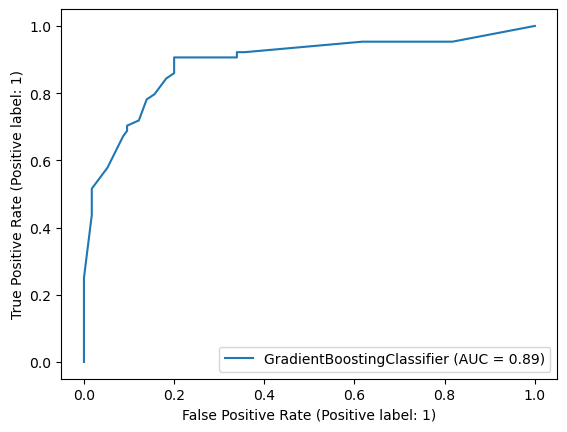

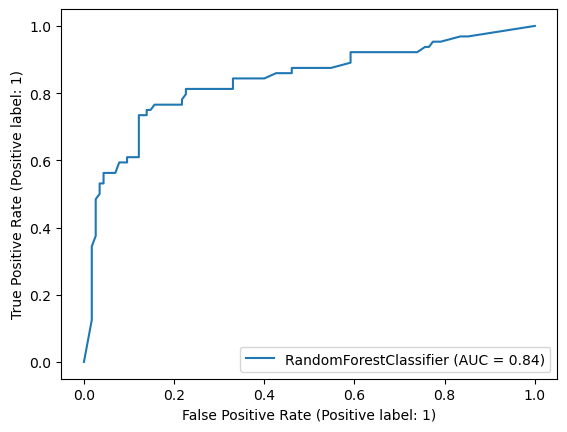

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

#use grid search to train a boosted decision tree
bt = GradientBoostingClassifier()
parameters = {'n_estimators':(10,100,200)}
clf = GridSearchCV(bt,parameters,cv=5)
clf.fit(X_train,Y_train)
bt_best = clf.best_estimator_

#use grid search to train a random forest
rf = RandomForestClassifier()
parameters = {'n_estimators':(10,100,200)}
clf = GridSearchCV(rf,parameters,cv=5)
clf.fit(X_train,Y_train)
rf_best = clf.best_estimator_

metrics.RocCurveDisplay.from_estimator(bt_best,X_test,Y_test)
metrics.RocCurveDisplay.from_estimator(rf_best,X_test,Y_test)
plt.show()
